<a href="https://colab.research.google.com/github/karthikresi/prodigy_ds_task3/blob/main/prodigy_ds_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

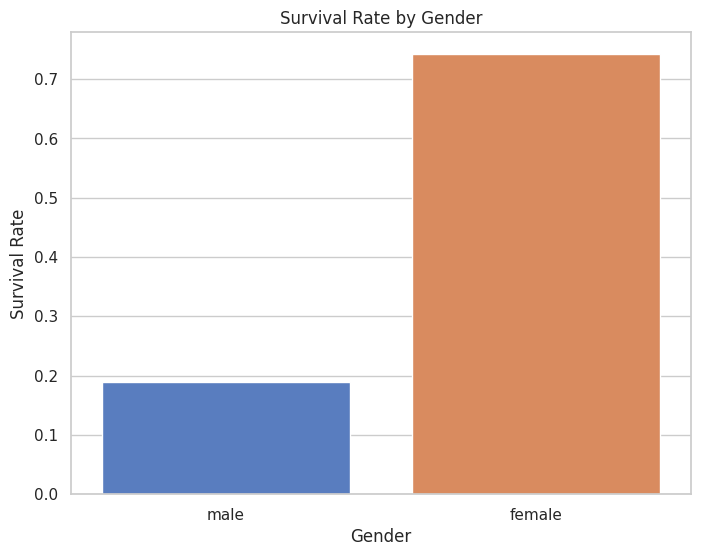

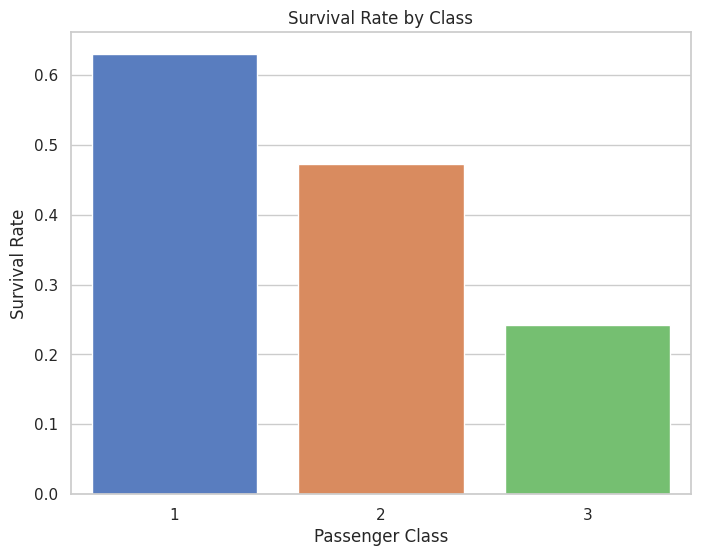

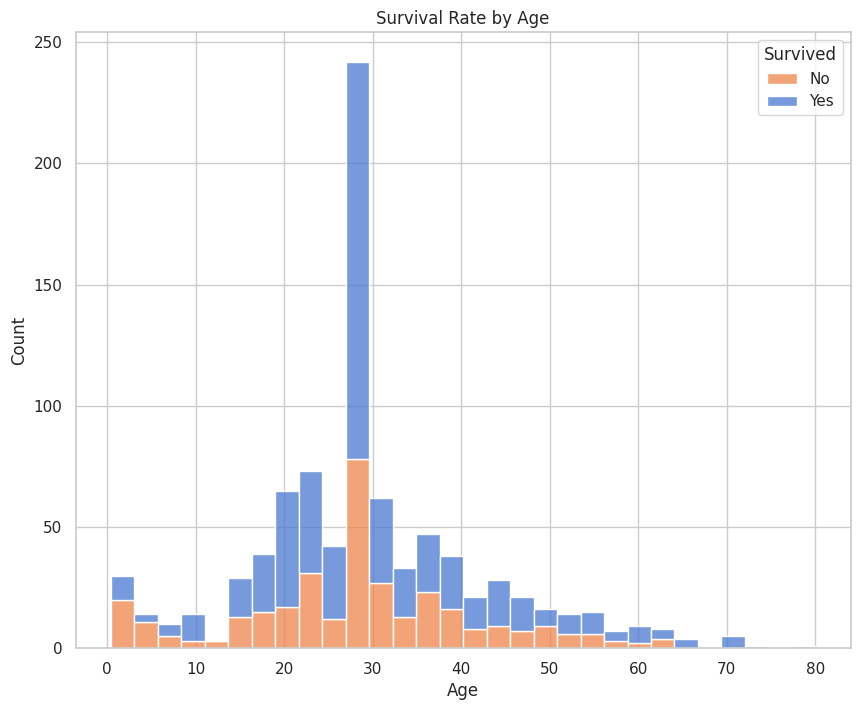

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_data = pd.read_csv('/content/Titanic.csv')

# 1. Data Cleaning
# Fill missing 'Age' values with the median
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to excessive missing values
titanic_data.drop(columns=['Cabin'], inplace=True)

# 2. Exploratory Data Analysis (EDA)
# Set the style for plots
sns.set(style="whitegrid")

# Survival Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x="Sex", y="Survived", hue="Sex", data=titanic_data, errorbar=None, palette="muted", legend=False)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.show()

# Survival Rate by Class
plt.figure(figsize=(8, 6))
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=titanic_data, errorbar=None, palette="muted", legend=False)
plt.title("Survival Rate by Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

# Survival Rate by Age using a Histogram
plt.figure(figsize=(10, 8))
sns.histplot(data=titanic_data, x='Age', hue='Survived', multiple='stack', kde=False, palette='muted')
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


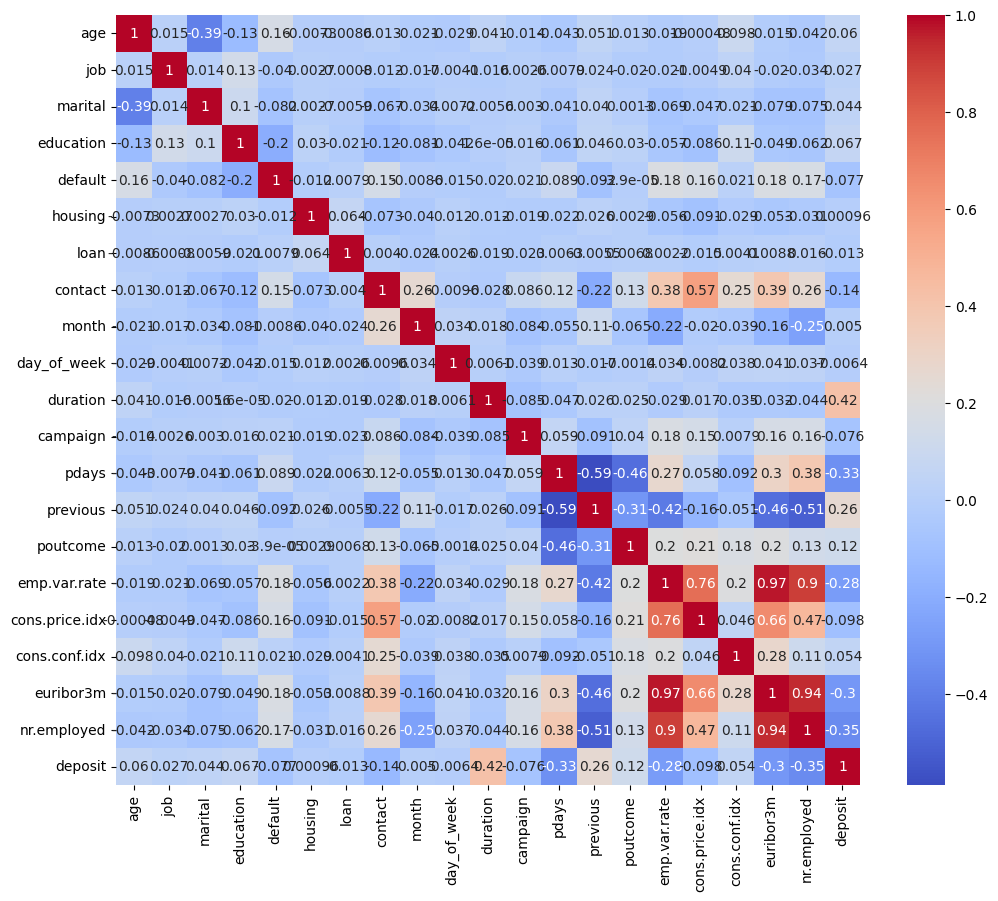

                     age       job   marital  education   default   housing  \
age             1.000000  0.014618 -0.393795  -0.125520  0.160562 -0.007279   
job             0.014618  1.000000  0.013616   0.134717 -0.040194  0.002725   
marital        -0.393795  0.013616  1.000000   0.104367 -0.082149  0.002659   
education      -0.125520  0.134717  0.104367   1.000000 -0.200550  0.030291   
default         0.160562 -0.040194 -0.082149  -0.200550  1.000000 -0.011599   
housing        -0.007279  0.002725  0.002659   0.030291 -0.011599  1.000000   
loan           -0.008605 -0.000800 -0.005926  -0.021281  0.007872  0.064208   
contact         0.012700 -0.011981 -0.067432  -0.116686  0.149737 -0.073007   
month          -0.020909 -0.016835 -0.033537  -0.080912 -0.008608 -0.039840   
day_of_week    -0.029297 -0.004120  0.007184  -0.042302 -0.014882  0.012389   
duration        0.041299 -0.016325 -0.005602   0.000016 -0.020449 -0.012226   
campaign       -0.014169  0.002553  0.003015   0.015

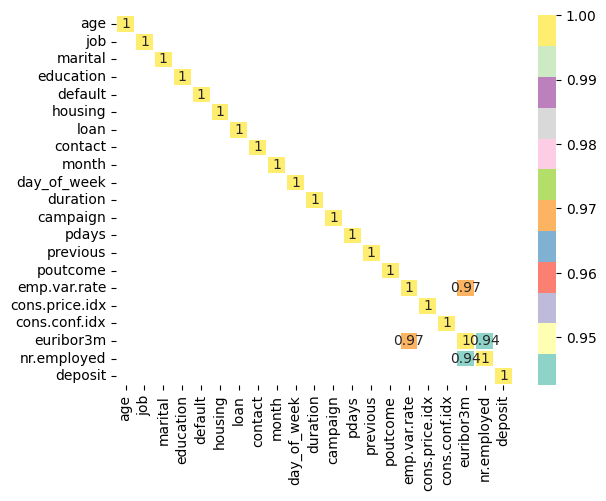

Training Score 0.923276141146002
Testing Score 0.9116504854368932
Accuracy_Score 0.9116504854368932
Confusion Matrix
 [[913  17]
 [ 74  26]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.60      0.26      0.36       100

    accuracy                           0.91      1030
   macro avg       0.76      0.62      0.66      1030
weighted avg       0.89      0.91      0.90      1030



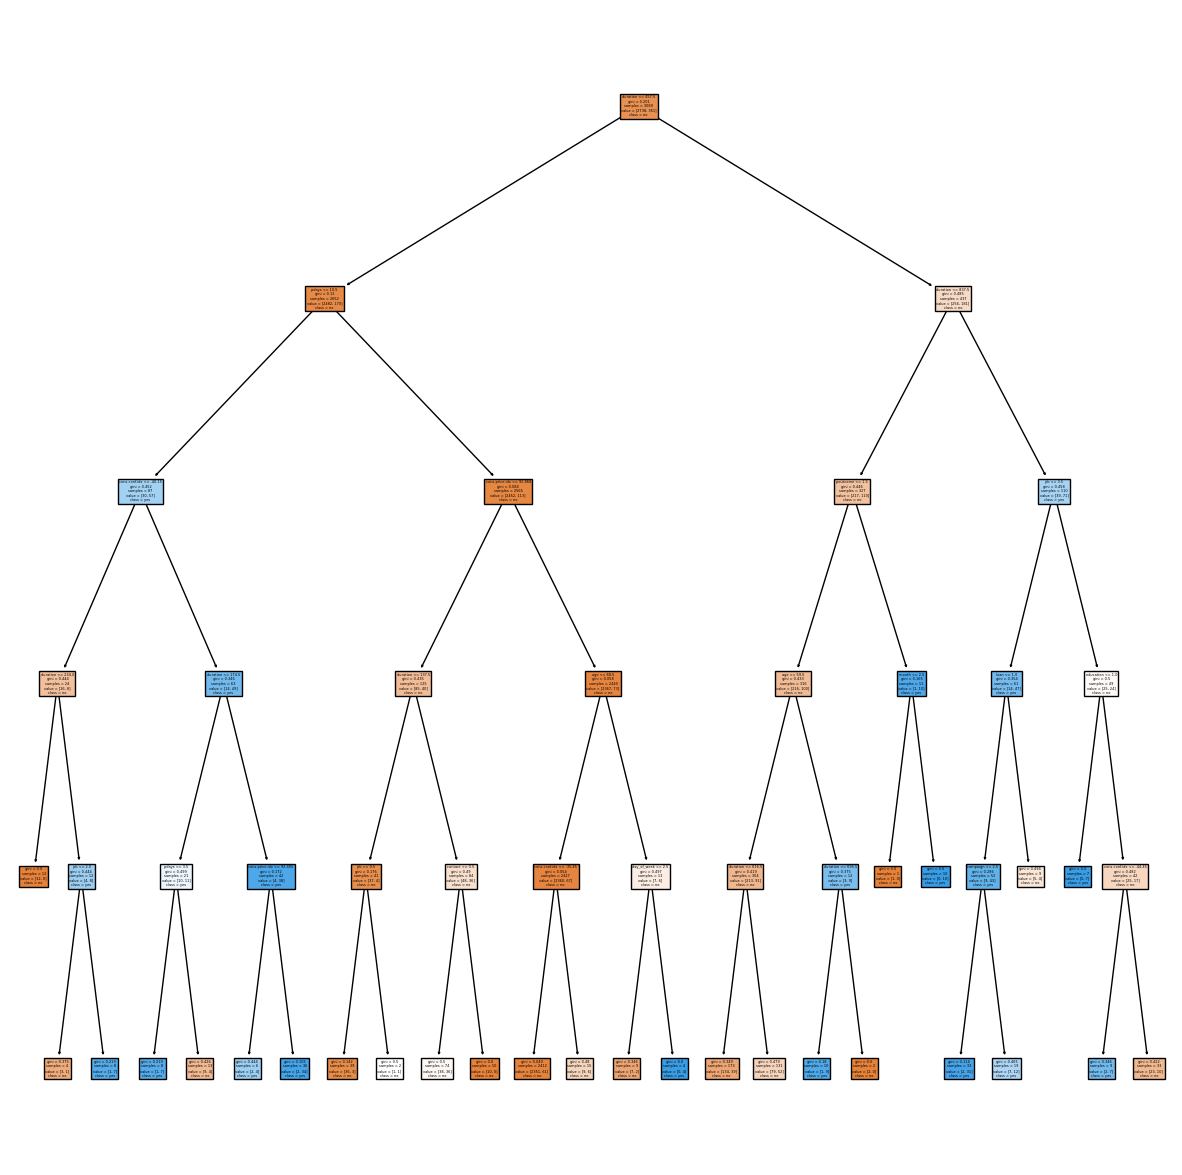

Training Score 0.9145354483651668
Testing Score 0.916504854368932
Accuracy_Score 0.916504854368932
Confusion Matrix
 [[912  18]
 [ 68  32]]
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       930
           1       0.64      0.32      0.43       100

    accuracy                           0.92      1030
   macro avg       0.79      0.65      0.69      1030
weighted avg       0.90      0.92      0.90      1030



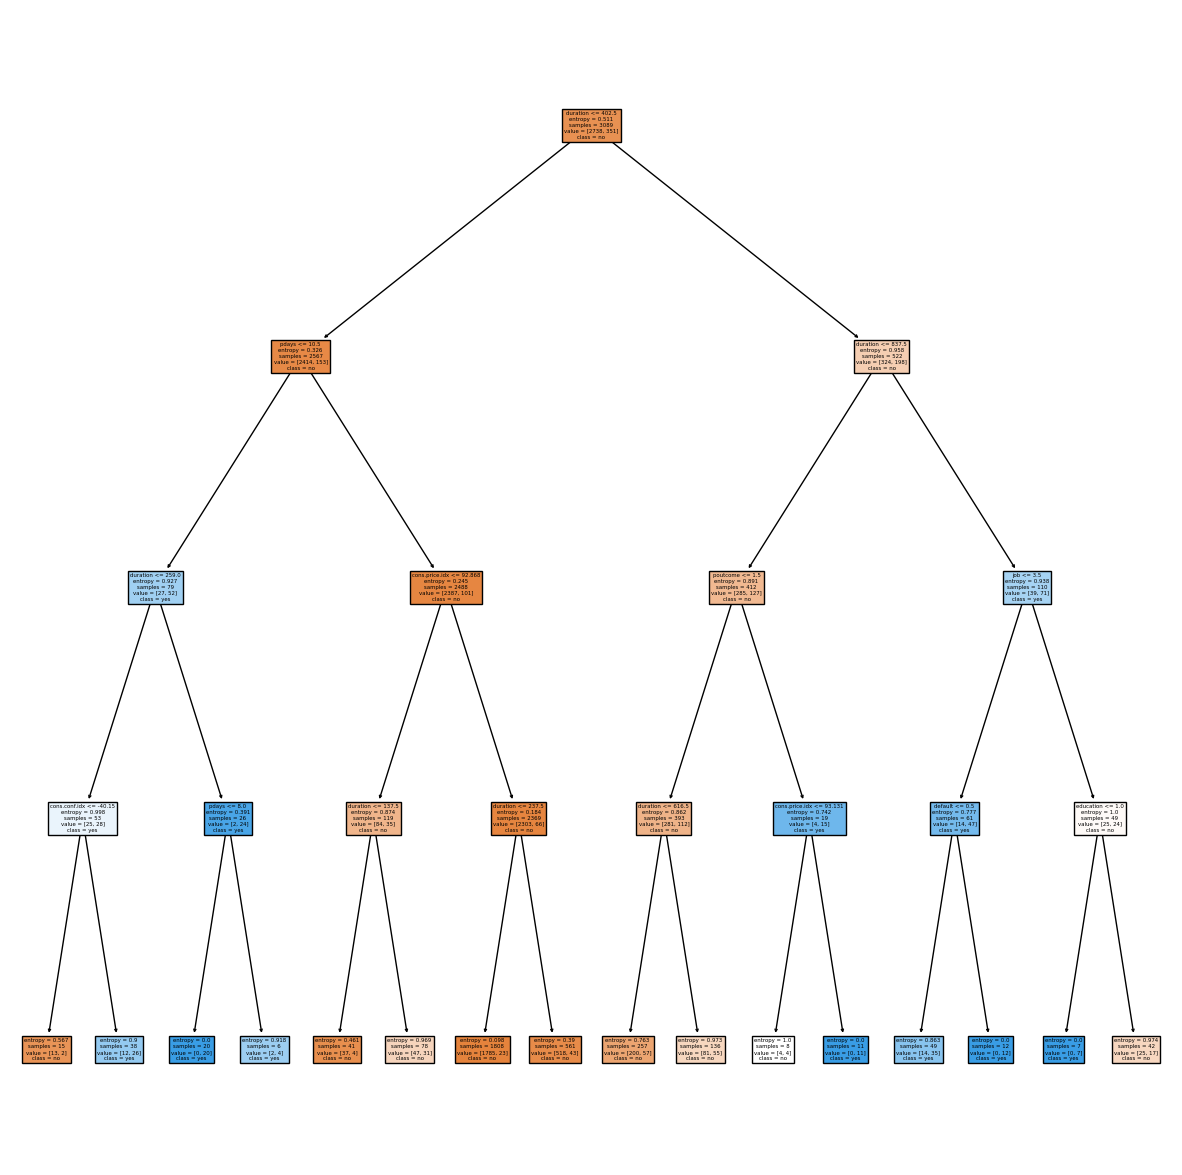

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

df = pd.read_csv("/content/bank-additional.csv", delimiter=';')
df.rename(columns={'y': 'deposit'}, inplace=True)

# Separate categorical and numerical columns
df_obj = df.select_dtypes(include='object').columns
df_num = df.select_dtypes(exclude='object').columns

# Convert categorical columns to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
for col in df_obj:
    df[col] = lb.fit_transform(df[col])

# Now df is fully numeric, ready for correlation analysis
plt.figure(figsize=(12, 10))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Continuing with the remaining code...

corr = df.corr()
print(corr)

corr_high = corr[abs(corr) >= 0.90]
sb.heatmap(corr_high, annot=True, cmap='Set3', linewidths=0.2)
plt.show()

# Remove highly correlated columns
high_corr_cols = ['emp.var.rate', 'euribor3m', 'nr.employed']
df1 = df.copy()
df1.drop(high_corr_cols, inplace=True, axis=1)

# Proceed with model building and evaluation
x = df1.drop('deposit', axis=1)
y = df1['deposit']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def eval_model(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy_Score', acc)
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix\n', cm)
    print('Classification Report\n', classification_report(y_test, y_pred))

def mscore(model):
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print('Training Score', train_score)
    print('Testing Score', test_score)

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10)
dt.fit(x_train, y_train)

# Evaluate model accuracy
mscore(dt)

# Generate predictions
ypred_dt = dt.predict(x_test)
eval_model(y_test, ypred_dt)

from sklearn.tree import plot_tree

cn = ['no', 'yes']
fn = x_train.columns

plt.figure(figsize=(15, 15))
plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

# Decision Tree Classifier with different parameters
dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)
dt1.fit(x_train, y_train)

mscore(dt1)

ypred_dt1 = dt1.predict(x_test)
eval_model(y_test, ypred_dt1)

plt.figure(figsize=(15, 15))
plot_tree(dt1, feature_names=fn, class_names=cn, filled=True)
plt.show()









# New section

# New section